In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.datasets import make_blobs
data = make_blobs(n_samples=200,n_features=2,centers=4,cluster_std=1,random_state=23)
plt.figure(figsize=(12,8))
plt.scatter(data[0][:,0],data[0][:,1],c=data[1],cmap="rainbow")

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

In [23]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(data[0])
kmeans.cluster_centers_
kmeans.labels_

KeyError: 0

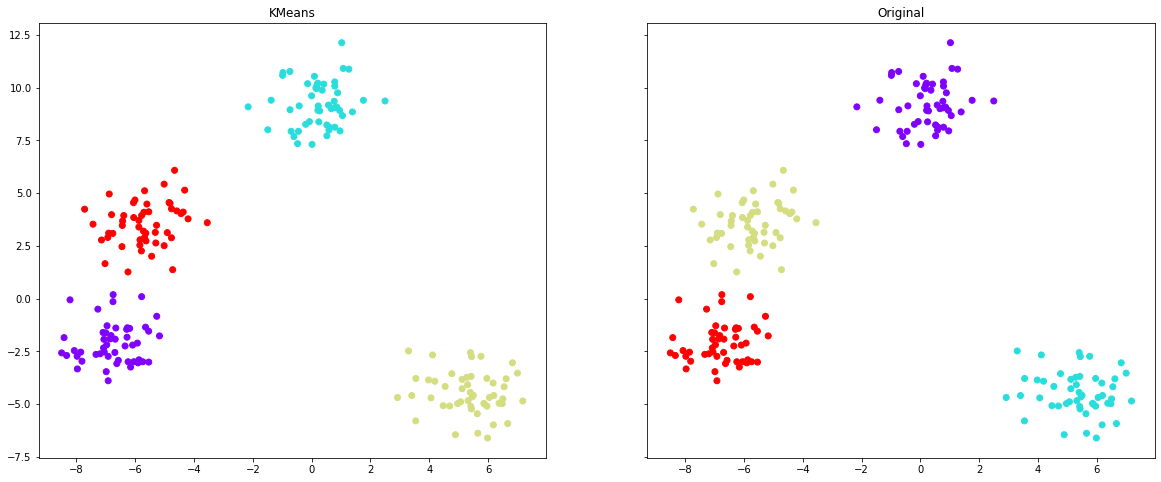

In [3]:
f,(ax1,ax2)=plt.subplots(1,2,sharey=True,figsize=(20,8))
ax1.set_title("KMeans")
ax1.scatter(data[0][:,0],data[0][:,1],c=kmeans.labels_,cmap="rainbow")
ax2.set_title("Original")
ax2.scatter(data[0][:,0],data[0][:,1],c=data[1],cmap="rainbow")

[ 0  0  1  2  1  3  0  2  3  1  3  2  2  2  3  3  3  3  2  2  3  3  2  1
  2  1  3  0  2  2  3  3 -1  0  1  3  2  1  1  2  4  0 -1  0  1  3  1  3
  0  3  2  2  2  1  0  0  2  3  1  2  1  3  0  1  1  0  3  2  3  1  3  1
  0  2  0  1  2  3  3  1  2  1  3  1  3  0  3  1  2  2  1  2  2  2  1  1
  0  2  2  0  0  0  0  3  2  0  3  3  1  3  1  3  1  2  0  4  0  3  0  2
  1  1  2  0  1  3  1  1  0  3  0  0 -1  1  0  0  2  1  2  0  1  1  0  3
  3  0  0  2  0  2  3  3  3  2  0  0  0  2  1  3  1  1  2  0  1  1  2  0
  0  0  2  0  2  2  3  1  3  0  3  3  2  1  1  1  1  2  3  2  2  0  3  1
  2  3  3  2  3  0  0  1]


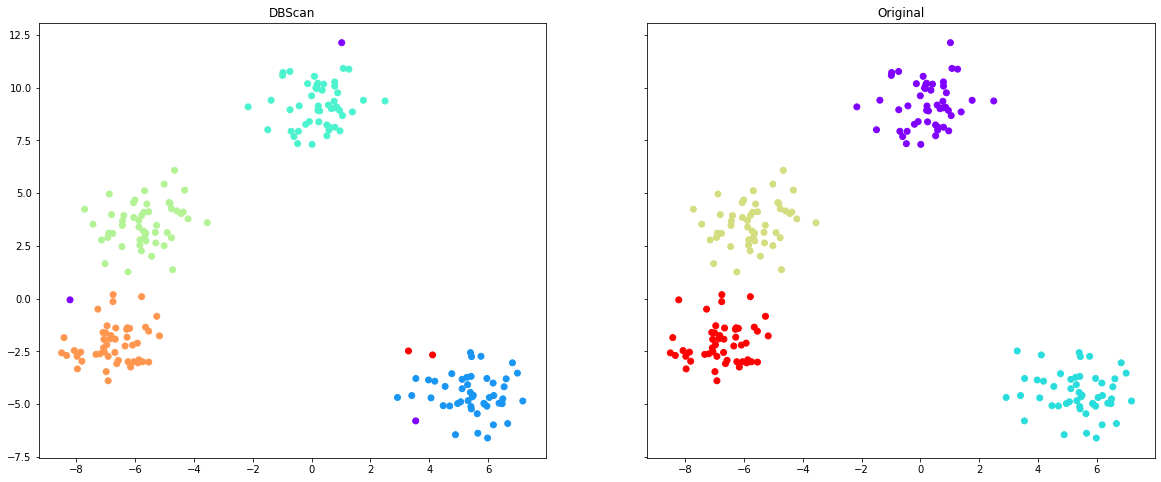

In [4]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=1, min_samples=2).fit(data[0])
f,(ax1,ax2)=plt.subplots(1,2,sharey=True,figsize=(20,8))
ax1.set_title("DBScan")
ax1.scatter(data[0][:,0],data[0][:,1],c=dbscan.labels_,cmap="rainbow")
ax2.set_title("Original")
ax2.scatter(data[0][:,0],data[0][:,1],c=data[1],cmap="rainbow")
print(dbscan.labels_)

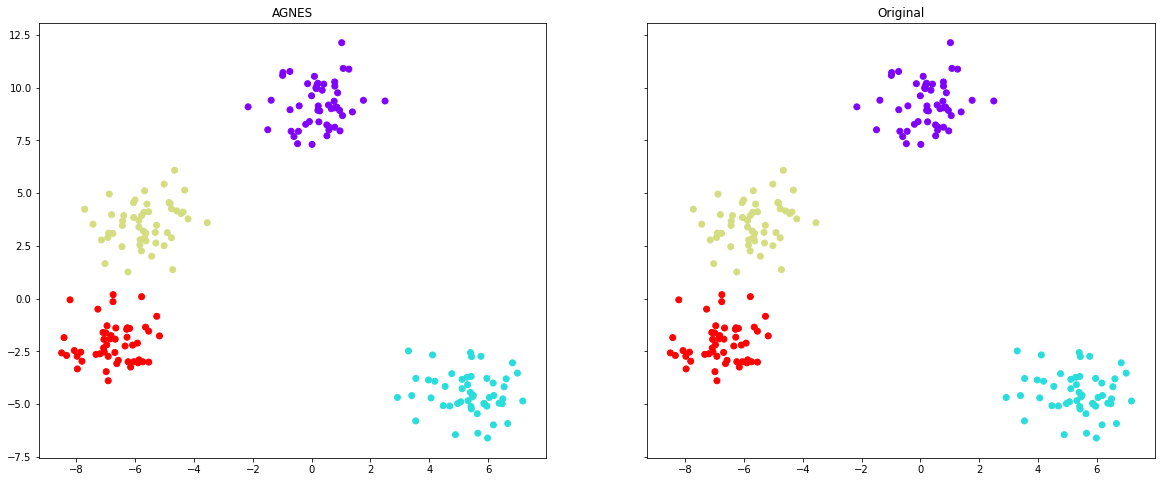

In [5]:
from sklearn.cluster import AgglomerativeClustering
agnes = AgglomerativeClustering(n_clusters=4,linkage="ward").fit(data[0])
f,(ax1,ax2)=plt.subplots(1,2,sharey=True,figsize=(20,8))
ax1.set_title("AGNES")
ax1.scatter(data[0][:,0],data[0][:,1],c=agnes.labels_,cmap="rainbow")
ax2.set_title("Original")
ax2.scatter(data[0][:,0],data[0][:,1],c=data[1],cmap="rainbow")

In [6]:
from sklearn import metrics
print(data[1])
print(kmeans.labels_)
print(dbscan.labels_)
print(agnes.labels_)
print("Score K-means: ",metrics.rand_score(data[1],kmeans.labels_))
print("Score DbScan: ",metrics.rand_score(data[1],dbscan.labels_))
print("Score Agnes: ",metrics.rand_score(data[1],agnes.labels_))


[1 1 0 2 0 3 1 2 3 0 3 2 2 2 3 3 3 3 2 2 3 3 2 0 2 0 3 1 2 2 3 3 1 1 0 3 2
 0 0 2 1 1 0 1 0 3 0 3 1 3 2 2 2 0 1 1 2 3 0 2 0 3 1 0 0 1 3 2 3 0 3 0 1 2
 1 0 2 3 3 0 2 0 3 0 3 1 3 0 2 2 0 2 2 2 0 0 1 2 2 1 1 1 1 3 2 1 3 3 0 3 0
 3 0 2 1 1 1 3 1 2 0 0 2 1 0 3 0 0 1 3 1 1 3 0 1 1 2 0 2 1 0 0 1 3 3 1 1 2
 1 2 3 3 3 2 1 1 1 2 0 3 0 0 2 1 0 0 2 1 1 1 2 1 2 2 3 0 3 1 3 3 2 0 0 0 0
 2 3 2 2 1 3 0 2 3 3 2 3 1 1 0]
[2 2 1 3 1 0 2 3 0 1 0 3 3 3 0 0 0 0 3 3 0 0 3 1 3 1 0 2 3 3 0 0 2 2 1 0 3
 1 1 3 2 2 1 2 1 0 1 0 2 0 3 3 3 1 2 2 3 0 1 3 1 0 2 1 1 2 0 3 0 1 0 1 2 3
 2 1 3 0 0 1 3 1 0 1 0 2 0 1 3 3 1 3 3 3 1 1 2 3 3 2 2 2 2 0 3 2 0 0 1 0 1
 0 1 3 2 2 2 0 2 3 1 1 3 2 1 0 1 1 2 0 2 2 0 1 2 2 3 1 3 2 1 1 2 0 0 2 2 3
 2 3 0 0 0 3 2 2 2 3 1 0 1 1 3 2 1 1 3 2 2 2 3 2 3 3 0 1 0 2 0 0 3 1 1 1 1
 3 0 3 3 2 0 1 3 0 0 3 0 2 2 1]
[ 0  0  1  2  1  3  0  2  3  1  3  2  2  2  3  3  3  3  2  2  3  3  2  1
  2  1  3  0  2  2  3  3 -1  0  1  3  2  1  1  2  4  0 -1  0  1  3  1  3
  0  3  2  2  2  1  0  0  2  3  1  2  1 

In [7]:
print("Score K-means: ",metrics.adjusted_mutual_info_score(data[1],kmeans.labels_))
print("Score DbScan: ",metrics.adjusted_mutual_info_score(data[1],dbscan.labels_))
print("Score Agnes: ",metrics.adjusted_mutual_info_score(data[1],agnes.labels_))

Score K-means:  1.0
Score DbScan:  0.9527536812608639
Score Agnes:  1.0


In [8]:
from sklearn import metrics
labels_true = [0, 0, 0, 1, 1, 1]
labels_pred = [0, 0, 0, 0, 0, 0]
print(metrics.rand_score(labels_true, labels_pred))
print(metrics.adjusted_mutual_info_score(labels_true, labels_true))


0.4
1.0


In [9]:
print("Homogeneidade K-means: ",metrics.homogeneity_score(data[1],kmeans.labels_))
print("Homogeneidade DbScan: ",metrics.homogeneity_score(data[1],dbscan.labels_))
print("Homogeneidade Agnes: ",metrics.homogeneity_score(data[1],agnes.labels_))


Homogeneidade K-means:  1.0
Homogeneidade DbScan:  0.9881127812445912
Homogeneidade Agnes:  1.0


In [10]:
print("Completude K-means: ",metrics.completeness_score(data[1],kmeans.labels_))
print("Completude DbScan: ",metrics.completeness_score(data[1],dbscan.labels_))
print("Completude Agnes: ",metrics.completeness_score(data[1],agnes.labels_))

Completude K-means:  1.0
Completude DbScan:  0.9223572412586954
Completude Agnes:  1.0


In [15]:
from sklearn import metrics
from sklearn.metrics import pairwise_distances
from sklearn import datasets
import numpy as np
from sklearn.cluster import KMeans
X, y = datasets.load_iris(return_X_y=True)
kmeans_model = KMeans(n_clusters=3, random_state=1).fit(X)
labels = kmeans_model.labels_
dbscan = DBSCAN(eps=1, min_samples=2).fit(X)
labels = dbscan.labels_
agnes = AgglomerativeClustering(n_clusters=3,linkage="ward").fit(X)
labels = kmeans.labels_


In [16]:

print(metrics.silhouette_score(X, labels, metric='euclidean'))

ValueError: Found input variables with inconsistent numbers of samples: [150, 200]

In [17]:
from sklearn.metrics.cluster import pair_confusion_matrix
print("kmeans: ", pair_confusion_matrix(data[1], kmeans.labels_))
print("DBScan: ",pair_confusion_matrix(data[1], dbscan.labels_))
print("AGNES: ",pair_confusion_matrix(data[1], agnes.labels_))


kmeans:  [[30000     0]
 [    0  9800]]


ValueError: Found input variables with inconsistent numbers of samples: [200, 150]

In [18]:
from sklearn.metrics.cluster import contingency_matrix
x = kmeans.labels_
y = data[1]
contingency_matrix(x,y)

array([[ 0,  0,  0, 50],
       [50,  0,  0,  0],
       [ 0, 50,  0,  0],
       [ 0,  0, 50,  0]])